### Implementation of the PSO Algorithm for Maximizing a Function

Initially, I use the NumPy library for faster processing.

To maximize this equation using the PSO algorithm, I define two classes: 
**Bird** 
and 
**Swarm**.


### Steps of the PSO Algorithm

1. Initialize a population of birds with random positions and velocities.
2. Evaluate the fitness of each bird by calculating the value of the function at its current position.
3. Update the personal best solution for each bird if its fitness improves.
4. Update the global best solution for the entire population based on the fitness of all birds.
5. Update the velocity and position of each bird using the PSO equations.
6. Repeat steps 2-5 until a stopping criterion, such as a maximum number of iterations or a desired fitness level, is met.
7. In each iteration, if the global best solution improves, update the best solution found so far.
8. Print the global and best solutions found by the PSO algorithm.


In [309]:
from mpmath import mp
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

### Class Definitions

#### Bird Class

The **Bird** class represents a particle in this algorithm and includes the following attributes:

- **position**: An array that indicates the position of the bird in the search space.
- **speed (v)**: An array that represents the velocity of the bird.
- **w**: The inertia weight parameter of the algorithm.
- **c1**: The cognitive parameter of the algorithm.
- **c2**: The social parameter of the algorithm.
- **globalSolutions**: The best solutions found by the entire population.
- **fitness**: The value of each bird.
- **bestFitness**: The best fitness that the bird has achieved.
- **bestPosition**: The best position of the bird based on fitness.
- **fitnessFunction()**: The fitness function.
- **movementBird()**: The movement function.


#### fitnessFunction
This function calculates the fitness of the bird based on its value in the given equation.


#### movementBird
First, the bird's inertia is determined using its speed. Then, the remaining value is divided by ten to prevent numerical instability and ensure that the inertia does not exceed a certain limit.

Next, the global best and personal best vectors are calculated and multiplied by a random number between zero and one, along with the values of c1 and c2.

The new velocity of the bird is then computed as the sum of these three variables.

Now, we check the bird's position to ensure it falls within the search boundaries. If it doesn't, we constrain its value to be between -10 and 10 (for both vectors).

Before that, the bird's position is updated based on the new speed, and then we verify if it remains within the defined bounds.

Finally, we update its best values.


In [310]:
class Bird:
    def __init__(self,position,speed , wInersi , c1, c2 ,globalsSolution, boundX=[-10 , 10] , boundY =[-10,10]):
        self.position = np.array(position)
        self.wInersi=wInersi
        self.c1=c1
        self.c2=c2
        self.globalsSolution=globalsSolution
        self.speed = np.array(speed)
        self.fitness = self.fitnessFunction()
        self.bestFitness = self.fitness
        self.bestPosition = self.position
        self.boundX = boundX
        self.boundY = boundY
        
    def fitnessFunction(self):
        x,y = self.position
        temp = mp.absmax(1-(mp.sqrt(x**2+y**2)/mp.pi))
        return mp.absmax(mp.sin(x)*mp.cos(y)*mp.exp(temp))
    
    def movementBird(self):
        inersi = self.wInersi*(self.speed%10)
        personal_best = self.c1*np.random.rand()*(self.bestPosition-self.position)
        global_best = self.c2*np.random.rand()*(self.globalsSolution[1]-self.position)
        
        v2 = inersi+personal_best+global_best
        self.position = self.position+v2
        self.speed = v2
        
        x,y = self.position

        xLengh = abs(self.boundX[0] - self.boundX[1])
        yLengh = abs(self.boundY[0] - self.boundY[1])

        x = ((x-self.boundX[0])% xLengh)+self.boundX[0]
        y = ((y-self.boundY[0])% yLengh)+self.boundY[0]
        
        self.position = np.array([x,y])
        
        self.fitness = self.fitnessFunction()
        if(self.fitness>self.bestFitness):
            self.bestFitness = self.fitness
            self.bestPosition = self.position
        
        if(self.fitness>self.globalsSolution[0]):
            self.globalsSolution[0] = self.fitness
            self.globalsSolution[1] = self.position
        
        return
    


#### Swarm Class

This class represents the collection of all birds, and here are its important attributes:

- **Birds**: All the birds we have.
- **bestSolutions**: The best solutions mentioned earlier.
- **bestAns**: The best answer we find.

- **iterations**: The number of iterations we perform.

- **__init__()**: This function initializes the class and constructs our initial population with random positions.
- **genIterations()**: In this function, we create the new iteration using the next iteration method.
- **prnt()**: We print the best answer.
- **printPlot()**: We plot the results.


In [311]:
class swarm:
    Birds=[]
    globalsSolution = [0,[0,0]]
    bestAns = [0,[0,0]]
    def __init__ (self , populationSize , wInersi , c1, c2,itrantions = 20 ) : 
        sampleBird = Bird((0,0),(0,0), wInersi , c1, c2 , self.globalsSolution)
        self.globalsSolution[0] = sampleBird.bestFitness
        self.globalsSolution[1] = sampleBird.bestPosition
        self.itrantions = itrantions
        for _ in range(populationSize):
            x,y,v1,v2 = [np.random.choice([-1,1])*np.random.rand()*10 for _ in range(4)]
            self.Birds+=[Bird((x,y),(v1,v2) ,wInersi , c1, c2 ,self.globalsSolution)]

    def nextItration (self , isOdd ): 
        for sampleBird in self.Birds:
            sampleBird.movementBird()    
        if(isOdd):
            self.itrationX+=[np.array([sampleBird.position[0] for sampleBird in self.Birds])]
            self.itrationY+=[np.array([sampleBird.position[1] for sampleBird in self.Birds])]

    def genItrantions (self):
        self.itrationX=[]
        self.itrationY=[]
        for i in range(self.itrantions):
            self.nextItration(i%2!=0)
            if (self.globalsSolution[0]> self.bestAns[0]):
                self.bestAns[0] = self.globalsSolution[0]
                self.bestAns[1][0],self.bestAns[1][1] = self.globalsSolution[1][0],self.globalsSolution[1][1]
                print(f'new best answer is : {self.bestAns[0]} width coordinates : {self.bestAns[1]} ')
    
    
        

    def prnt(self):
        print(self.globalsSolution[0],self.globalsSolution[1])
        print(f'the best answer in { self.itrantions } itrations is :  {self.bestAns[0]} width coordinates : {self.bestAns[1]} ')


    def printPlot(self):
        import matplotlib.pyplot as plt
        plt.plot(self.itrationX, self.itrationY,'o')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
        

In [312]:
w = 0.005
c1 = 0.8
c2 = 1.5
populationSize = 60
mp.dps=20

test = swarm(populationSize, w , c1, c2 , itrantions = 1000)
test.genItrantions()
test.prnt()


new best answer is : 19.040638041305419424 width coordinates : [-7.935336889551083, 9.719700394061203] 
new best answer is : 19.12840626498327612 width coordinates : [-7.965903617134978, 9.682337999209494] 
new best answer is : 19.204561364743714944 width coordinates : [-8.072522159295316, 9.673905968595001] 
new best answer is : 19.204798644149652435 width coordinates : [-8.072763811364716, 9.672051258019433] 
new best answer is : 19.207759510413713607 width coordinates : [-8.04837329204503, 9.6591430951738] 
new best answer is : 19.208230051671636355 width coordinates : [-8.050194295347511, 9.666706758767766] 
new best answer is : 19.208456581955457459 width coordinates : [-8.056026168128286, 9.662685982531347] 
new best answer is : 19.208463197131441138 width coordinates : [-8.056720407131504, 9.663526232993078] 
new best answer is : 19.208493653647478868 width coordinates : [-8.055972184801623, 9.664641838623652] 
new best answer is : 19.208501372969729808 width coordinates : [-8.0

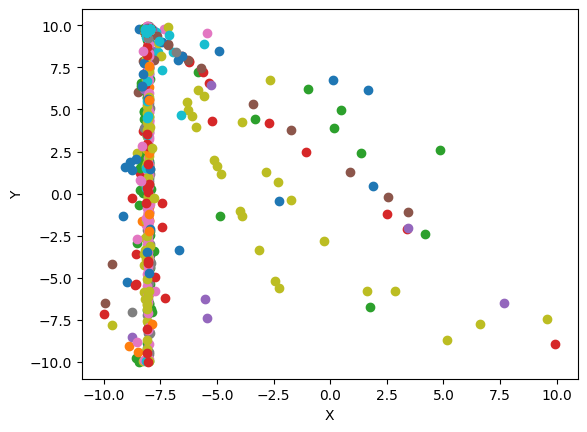

In [313]:
test.printPlot()

19.208492620668940001 [-8.05408737  9.66424064]
the best answer in 10 itrations is :  19.208502567192893966 width coordinates : [-8.055029787372018, 9.664584478518044] 


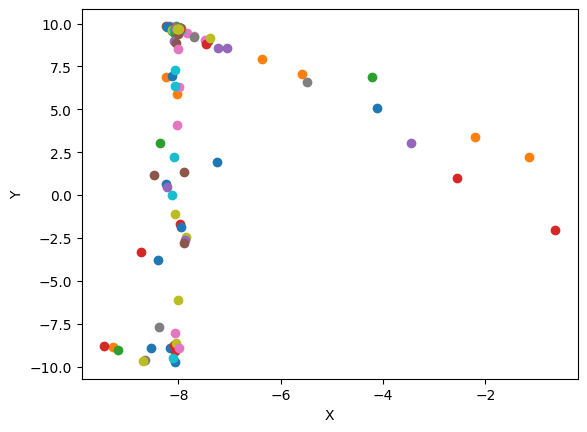

In [314]:
w = 0.005
c1 = 0.8
c2 = 1.5
populationSize = 10
mp.dps=20
itrantions=10

test = swarm(populationSize , w , c1, c2 , itrantions = itrantions)
test.genItrantions()
test.prnt()
test.printPlot()

19.208502535806929853 [-8.05503323  9.66464549]
the best answer in 10 itrations is :  19.208502567192893966 width coordinates : [-8.055029787372018, 9.664584478518044] 


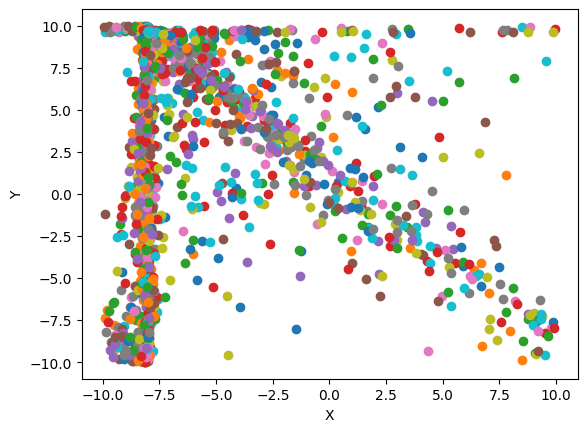

In [315]:
w = 0.005
c1 = 0.8
c2 = 1.5
populationSize= 600
mp.dps=20
itrantions = 10
test = swarm(populationSize , w , c1, c2 , itrantions = itrantions)
test.genItrantions()
test.prnt()
test.printPlot()

new best answer is : 19.208502567433451855 width coordinates : [-8.055020632267912, 9.664596141055686] 
new best answer is : 19.208502567718294088 width coordinates : [-8.055027327263113, 9.664588489709438] 
new best answer is : 19.208502567879303073 width coordinates : [-8.055022995172012, 9.664590739739811] 
19.208502567879303073 [-8.055023    9.66459074]
the best answer in 100 itrations is :  19.208502567879303073 width coordinates : [-8.055022995172012, 9.664590739739811] 


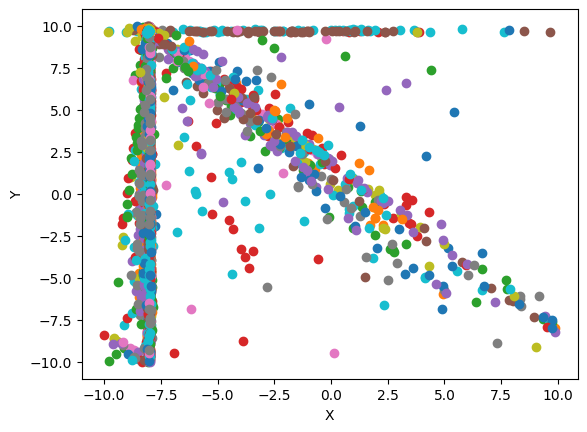

In [316]:
w = 0.005
c1 = 0.8
c2 = 1.5
populationSize = 60
mp.dps=20
itrantions=100

test = swarm(populationSize , w , c1, c2 , itrantions = itrantions)
test.genItrantions()
test.prnt()
test.printPlot()